# Wine Quality Prediction

In [1]:
# importing necessary libraries
import numpy as np  # numerical operations
import pandas as pd  # data manipulation
import seaborn as sns  # visualization
import matplotlib.pyplot as plt # visualization
%matplotlib inline

In [6]:
data = pd.read_csv('1788410-1767134-1729261-1613779-Red_wine__(1).csv') # importing dataset

### Information about the dataset

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [8]:
df = data.copy()

In [9]:
df.shape

(1599, 12)

In [10]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 1599
Number of Columns 12


In [11]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


### Check Null Values In The Dataset

In [14]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [15]:
df = data.dropna()
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Get Overall Statistics About The Dataset

5.0    679
6.0    637
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

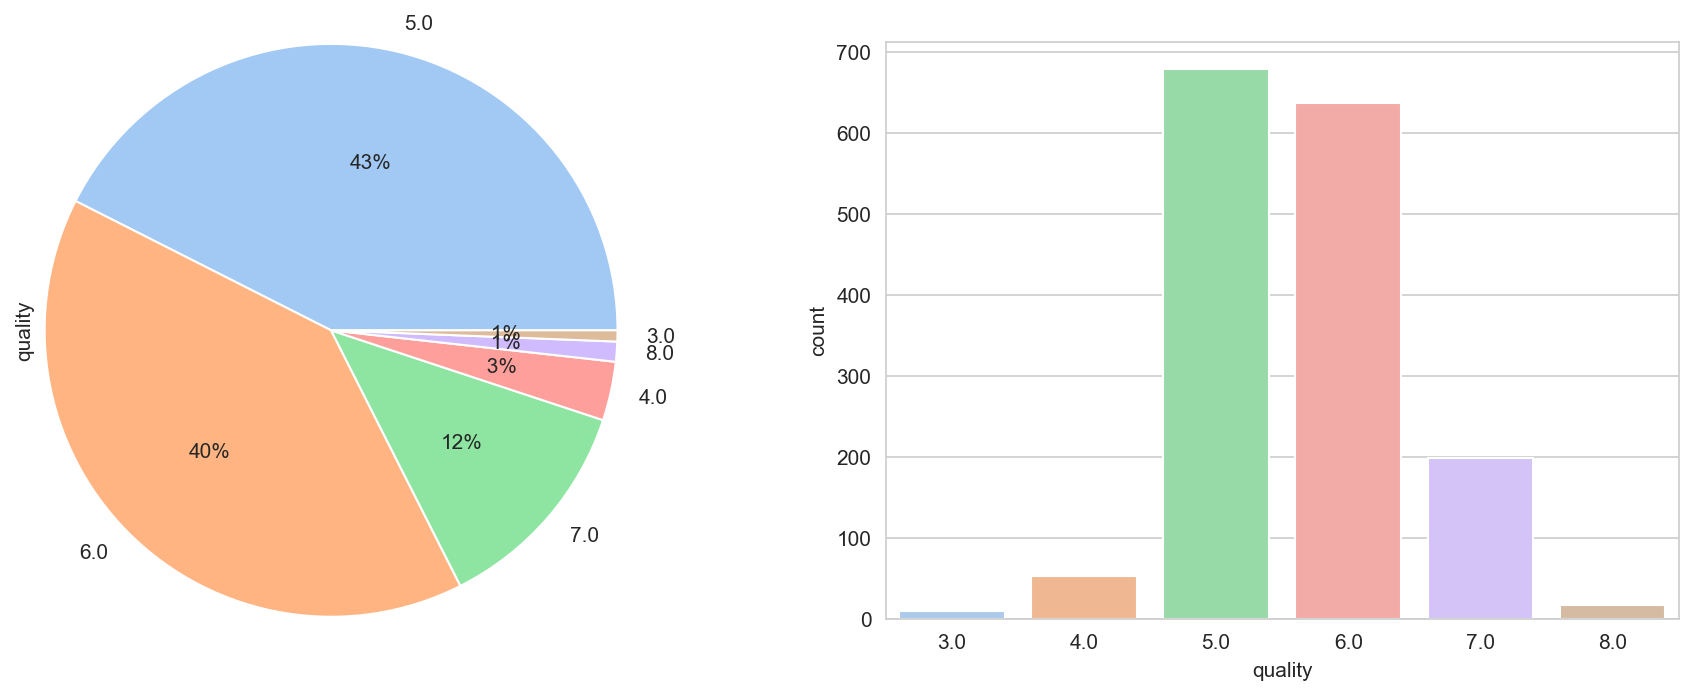

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(121)
df['quality'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))
plt.subplot(122)
sns.countplot(data=df, x='quality', palette='pastel')
df['quality'].value_counts()

In [18]:
data = df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   float64
dtypes: float64(12)
memory usage: 162.1 KB


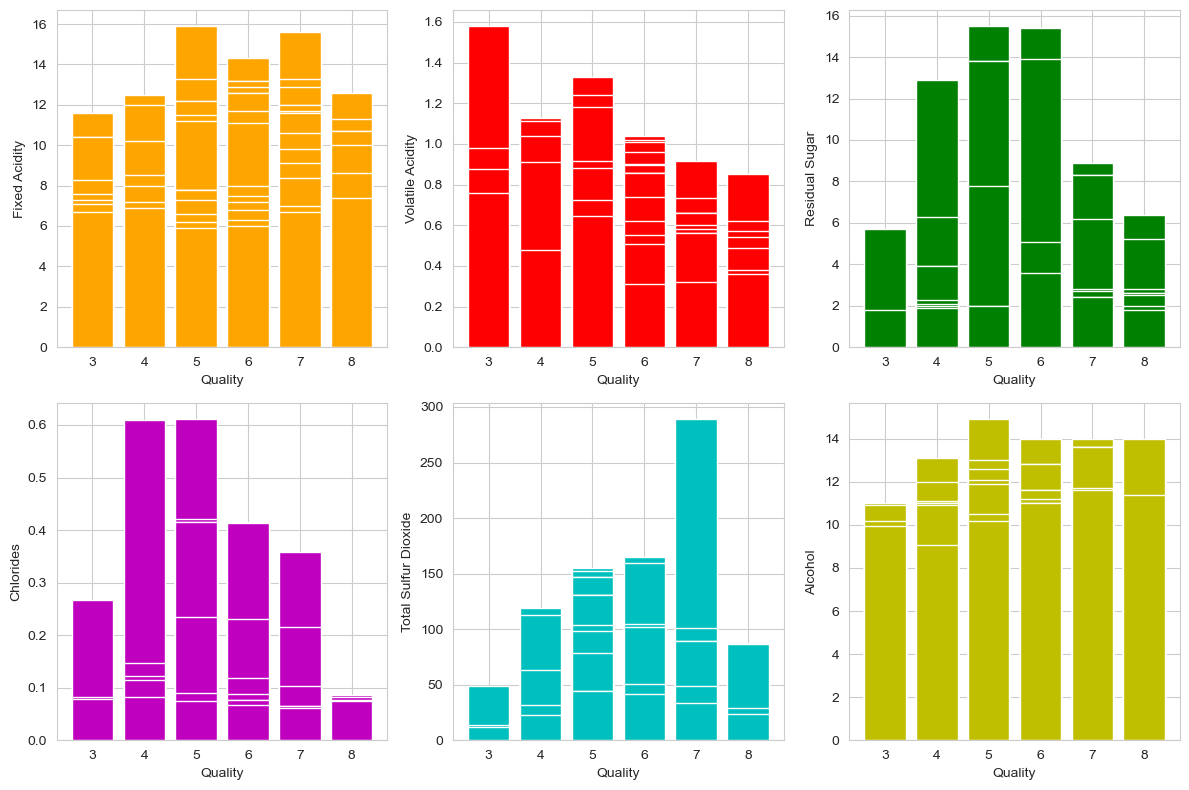

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].bar(df['quality'], df['fixed acidity'], color = 'orange')
axs[0, 0].set_xlabel('Quality')
axs[0, 0].set_ylabel('Fixed Acidity')

axs[0, 1].bar(df['quality'], df['volatile acidity'], color = 'r')
axs[0, 1].set_xlabel('Quality')
axs[0, 1].set_ylabel('Volatile Acidity')

axs[0, 2].bar(df['quality'], df['residual sugar'], color = 'g')
axs[0, 2].set_xlabel('Quality')
axs[0, 2].set_ylabel('Residual Sugar')

axs[1, 0].bar(df['quality'], df['chlorides'], color = 'm')
axs[1, 0].set_xlabel('Quality')
axs[1, 0].set_ylabel('Chlorides')

axs[1, 1].bar(df['quality'], df['total sulfur dioxide'], color = 'c')
axs[1, 1].set_xlabel('Quality')
axs[1, 1].set_ylabel('Total Sulfur Dioxide')

axs[1, 2].bar(df['quality'], df['alcohol'], color = 'y')
axs[1, 2].set_xlabel('Quality')
axs[1, 2].set_ylabel('Alcohol')

plt.tight_layout()
plt.show()

In [20]:
df['quality'] = df['quality'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 155.9 KB


In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [23]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
df_1 = df.copy()

In [25]:
def quality_value(value):
    value = str(value)
    if value == '3':
        value = value.replace('3','poor')
        return value
    elif value == '4':
        value = value.replace('4','poor')
        return value
    elif value == '5':
        value = value.replace('5','average')
        return value
    elif value == '6':
        value = value.replace('6','average')
        return value
    elif value == '7':
        value = value.replace('7','high')
        return value
    elif value == '8':
        value = value.replace('8','high')
        return value

df_1['quality']=df_1['quality'].apply(quality_value)

In [26]:
df_1['quality'].unique()

array(['average', 'high', 'poor'], dtype=object)

### Quality & Alcohol Relationship

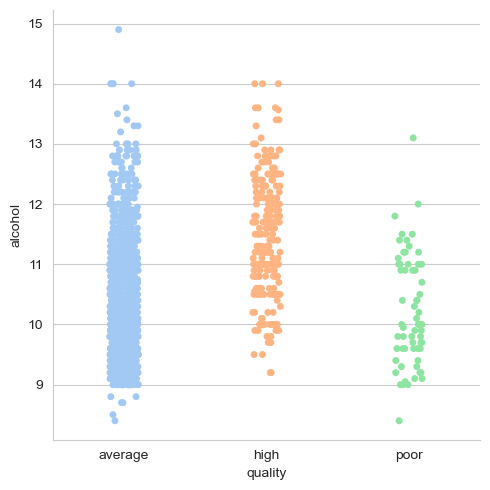

In [27]:
sns.catplot(x='quality', y='alcohol', hue = 'quality', data=df_1, palette = 'pastel')

### Quality & Sulphates Relationship

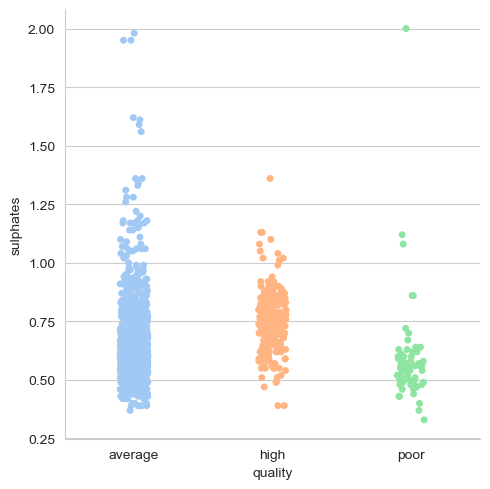

In [28]:
sns.catplot(x='quality', y='sulphates', hue = 'quality', data=df_1, palette = 'pastel')

### Quality & Volatile Acidity Relationship

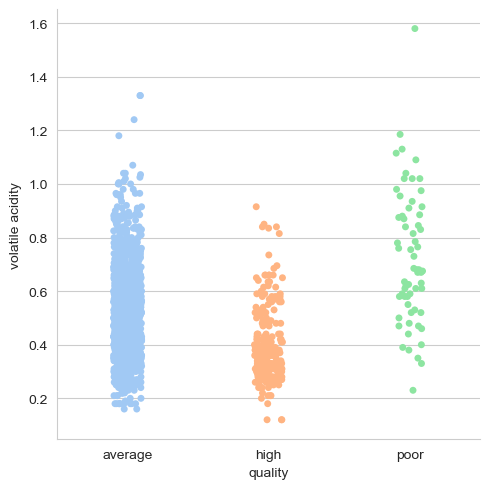

In [29]:
sns.catplot(x='quality', y='volatile acidity', hue = 'quality', data=df_1, palette = 'pastel')

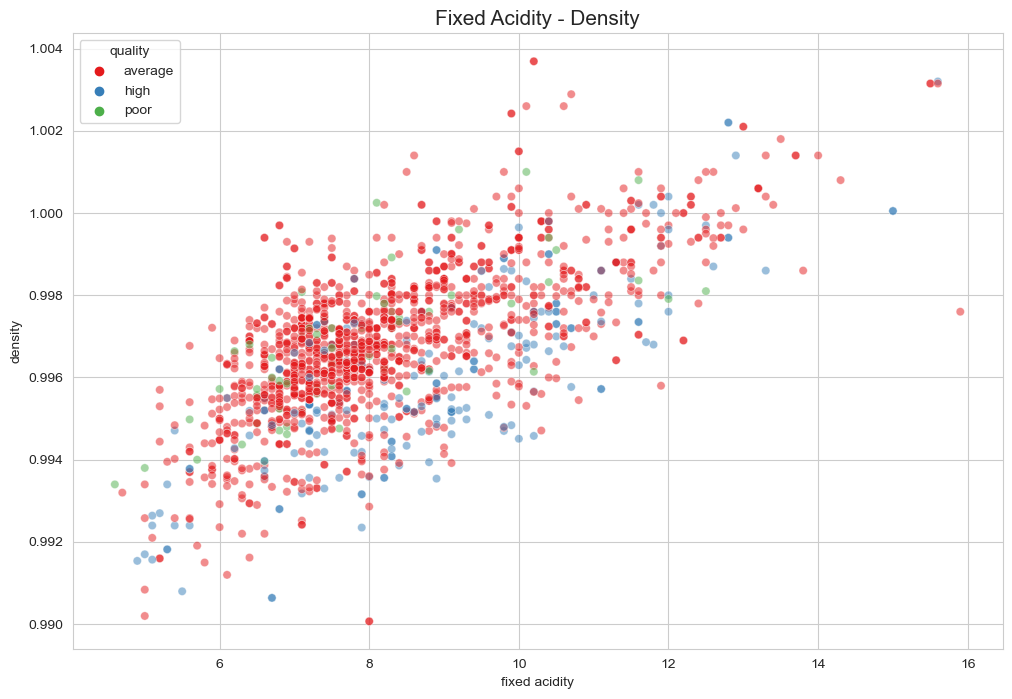

In [30]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'fixed acidity', y = 'density', hue = 'quality',data = df_1, alpha = 0.5, palette = 'Set1')
plt.title('Fixed Acidity - Density', size = 15)
plt.show()

<Axes: >

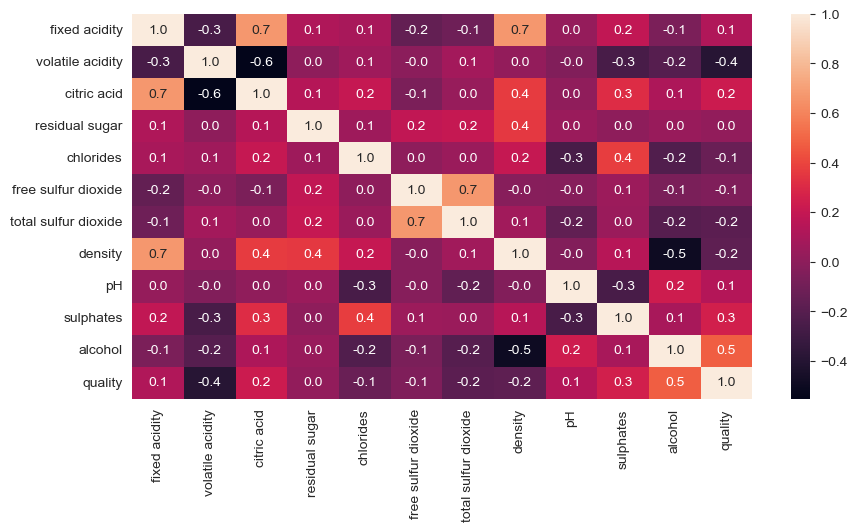

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='0.1f')

## DATA PREPROCESSING

In [32]:
def quality_value(value):
    value = str(value)
    if value == '3':
        value = value.replace('3','poor')
        return value
    elif value == '4':
        value = value.replace('4','poor')
        return value
    elif value == '5':
        value = value.replace('5','average')
        return value
    elif value == '6':
        value = value.replace('6','average')
        return value
    elif value == '7':
        value = value.replace('7','high')
        return value
    elif value == '8':
        value = value.replace('8','high')
        return value

df['quality']=df['quality'].apply(quality_value)

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average


In [34]:
#importing libraries
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
df['quality'] = df['quality'].map({'high': 2, 'average': 1, 'poor': 0})

In [36]:
df['quality'].unique()

array([1, 2, 0], dtype=int64)

In [37]:
# we determine our dependent and independent variables
y = df['quality']                    # dependent variable
x = df.drop(['quality'], axis=1)     # independent variables

In [38]:
x.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [39]:
y.head(3)

0    1
1    1
2    1
Name: quality, dtype: int64

### Train Test Split

In [40]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
print('X_train =', X_train.shape)
print('y_train =', y_train.shape)
print('X_test =', X_test.shape)
print('y_test =', y_test.shape)

X_train = (1276, 11)
y_train = (1276,)
X_test = (320, 11)
y_test = (320,)


### Standardization

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Smote

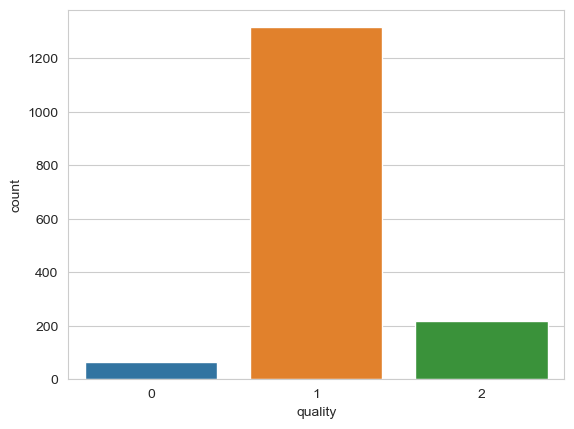

In [43]:
# let's observe the imbalance on the quality variable
sns.countplot(data=df, x='quality')
plt.show()

In [44]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

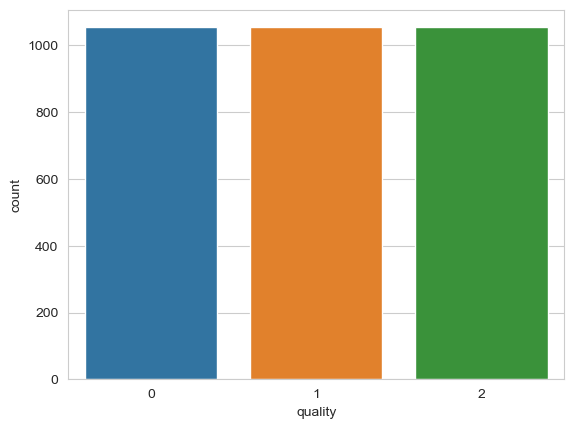

In [45]:
sns.countplot(x=y_train)
plt.show()

# MODELS

In [46]:
# models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# to evaluate the success of the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [47]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

results = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5)
    mean_accuracy = cv_results.mean()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    results.append((model_name, mean_accuracy, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(results, columns=['Model', 'Cross-Validation Accuracy', 'Test Accuracy'])
df_results.sort_values('Cross-Validation Accuracy', ascending=False, inplace=True)

print(df_results.to_string(index=False))

                    Model  Cross-Validation Accuracy  Test Accuracy
            Random Forest                   0.940232       0.831250
        Gradient Boosting                   0.897858       0.787500
            Decision Tree                   0.876355       0.753125
                      KNN                   0.872241       0.637500
Support Vector Classifier                   0.826380       0.656250
      Logistic Regression                   0.726127       0.556250
              Naive Bayes                   0.647694       0.425000


# Classification Report

In [49]:
for model_name, cr in classification_reports:
    print(f'\033[1m{model_name}:\033[0m')
    print(f'\033[1mClassification Report:\033[0m')
    print(cr)
    print('-'*60)

Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.54      0.16        13
           1       0.93      0.52      0.67       262
           2       0.34      0.76      0.47        45

    accuracy                           0.56       320
   macro avg       0.46      0.61      0.43       320
weighted avg       0.82      0.56      0.62       320

------------------------------------------------------------
Support Vector Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.38      0.16        13
           1       0.93      0.65      0.76       262
           2       0.40      0.78      0.53        45

    accuracy                           0.66       320
   macro avg       0.48      0.60      0.48       320
weighted avg       0.82      0.66      0.71       320

------------------------------------------------------------
Naive Bayes:
Classific

# The most sucsessful model is Random Forest Model

# Random Forest Model

In [50]:
!pip install optuna

In [51]:
import optuna

def objective(trial):
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt'])

    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 max_features=max_features, n_jobs=-1)

    scores = cross_val_score(clf, X_train, y_train, cv=5)
    accuracy = scores.mean()
    return accuracy

In [52]:
import warnings 
warnings.filterwarnings('ignore')

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, show_progress_bar=False)

best_params = study.best_params
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

[I 2023-07-15 15:45:35,381] A new study created in memory with name: no-name-038bda96-f776-42f7-aef9-57b76b14c831


In [53]:
print("Best Params:", best_params)
print(f'Test Accuracy: {accuracy}')
print(f'Classification Report:\n{cr}')

Best Params: {'n_estimators': 201, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'auto'}
Test Accuracy: 0.815625
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        13
           1       0.93      0.85      0.89       262
           2       0.53      0.78      0.63        45

    accuracy                           0.82       320
   macro avg       0.56      0.62      0.58       320
weighted avg       0.84      0.82      0.82       320



# GUI

In [54]:
from tkinter import Tk, Label, Entry, Button, messagebox
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the trained model and feature scaling parameters
model = RandomForestClassifier(n_estimators=164, max_depth=28, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
# Assuming you have already trained and saved the model

# Load the training data to fit the model
df = pd.read_csv('winequality-red.csv')  # Replace 'wine_quality.csv' with the actual filename of your training data
X_train = df.drop('quality', axis=1)
y_train = df['quality']
model.fit(X_train, y_train)

# Create a dictionary to map quality labels
quality_mapping = {3: 'Poor', 4: 'Poor', 5: 'Average', 6: 'Average', 7: 'High', 8: 'High'}

def predict_quality():
    # Get the user inputs
    p1 = float(entries['fixed acidity'].get())
    p2 = float(entries['volatile acidity'].get())
    p3 = float(entries['citric acid'].get())
    p4 = float(entries['residual sugar'].get())
    p5 = float(entries['chlorides'].get())
    p6 = float(entries['free sulfur dioxide'].get())
    p7 = float(entries['total sulfur dioxide'].get())
    p8 = float(entries['density'].get())
    p9 = float(entries['pH'].get())
    p10 = float(entries['sulphates'].get())
    p11 = float(entries['alcohol'].get())

    # Create a dataframe with the user inputs
    input_data = pd.DataFrame({
        'fixed acidity': [p1],
        'volatile acidity': [p2],
        'citric acid': [p3],
        'residual sugar': [p4],
        'chlorides': [p5],
        'free sulfur dioxide': [p6],
        'total sulfur dioxide': [p7],
        'density': [p8],
        'pH': [p9],
        'sulphates': [p10],
        'alcohol': [p11]
    })

    # Make the prediction
    quality_prediction = model.predict(input_data)[0]
    quality_label = quality_mapping[quality_prediction]

    # Show the prediction to the user
    messagebox.showinfo("Wine Quality Prediction", f"The predicted quality of the wine is: {quality_label}")


# Create the GUI window
window = Tk()
window.title("Wine Quality Predictor")

# Create labels and entry fields for user input
labels = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
entries = {}

for i, label in enumerate(labels):
    lbl = Label(window, text=label + ":")
    lbl.grid(row=i, column=0, padx=10, pady=10)

    entry = Entry(window, width=15)
    entry.grid(row=i, column=1, padx=10, pady=10)
    entries[label] = entry

# Create the predict button
btn_predict = Button(window, text="Predict Quality", command=predict_quality)
btn_predict.grid(row=len(labels), column=0, columnspan=2, padx=10, pady=10)

# Run the GUI window
window.mainloop()